<a href="https://colab.research.google.com/github/guptaa98/Kaggle-Notebooks/blob/master/Home_LLC_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict House Prices in US**


## 1. Business Problem 




### Description
Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country.
Out of all the factors,the two factors which will determine the house market would be Supply and Demand.

Problem_Statement
*   Given the dataset, predict the prices of house in US.
*   Determine how factors related to supply and demand affect the price of house



## Real World/Business Objectives and constraints
### Objectives
* Predict the price of the houses in US
* Observe how every feature affects the price.
* Minimise the RMSE/MSE score.

### Constraints
* Interpretability is important


## 2. Machine Learning Problem

### 2.1 Data

#### 2.1.1 Data Overview
* Data will be a file named as house_price.csv.
* Number of features = 7
* Number of records = 241

#### 2.1.2 Features's Description
* BUILDING PERMITS - No of premissions granted for new construction of houses.
* RENT - Rent a person has to pay for the existing house.
* MORTGAGE RATE (%) - The rate of interest a person has to pay on house loans.
* FORECLOSURE - No of houses siezed by banks when borrower fails to  back loan. 
* NET MIGRATION RATE -  difference between the no. of immigrants and emigrants 
* HCAI - represents index for the ease of getting a house loan.
* PRICE - Target. Price of house in US.

**The above features are those features which will affect the supply and demand of house in any area, and the supply and demand affects the price of house.**

**Subfeatures of Supply** - BUILDING PERMITS, RENT, FORECLOSURE, NET MIGRATION RATE(emmigration).

**Subfeatures of Demand** - MORTGAGE RATE (%), HCAI, NET MIGRATION RATE(immigration)

## 2.2 Mapping the real world problem to a Machine Learning Problem

### 2.2.1 Type of Machine Learning Problem
The problem involves predicting the house prices which are continuous and real valued. Hence this is the Regression problem.

### 2.2.2 Performance Metric
* Root Mean Squared Error(RMSE)

## 2.3 Train and Test data Construction
We'll built train and test data by randomly splitting the data into 70:30 ratio.

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Home.LLC /house_price.csv')

# 3. Exploratory Data Analysis

### 3.1 Reading data and basic stats

In [ ]:
df.head()

,BUILDING PERMITS,RENT,MORTGAGE RATE (%),FORECLOSURE,NET MIGRATION RATE,PRICE,HCAI
0,1699,188.2,7.03,2.34,4.812,109.846,16.253
1,1656,188.9,7.05,NaN,NaN,110.501,16.253
2,1659,189.6,6.95,NaN,NaN,111.108,16.253
3,1666,190.2,7.08,2.41,NaN,111.650,15.664
4,1665,191.0,7.15,NaN,NaN,112.162,15.664


In [ ]:
df.shape

(241, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BUILDING PERMITS    241 non-null    int64  
 1   RENT                241 non-null    float64
 2   MORTGAGE RATE (%)   241 non-null    float64
 3   FORECLOSURE         81 non-null     float64
 4   NET MIGRATION RATE  21 non-null     float64
 5   PRICE               241 non-null    float64
 6   HCAI                241 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 13.3 KB


In [ ]:
df.describe()

,BUILDING PERMITS,RENT,MORTGAGE RATE (%),FORECLOSURE,NET MIGRATION RATE,PRICE,HCAI
count,241.000000,241.000000,241.000000,81.000000,21.000000,241.000000,241.000000
mean,1310.481328,258.742004,4.936266,4.852469,3.393095,164.826295,8.462158
std,477.733050,43.829417,1.180857,3.303596,0.492107,28.920459,7.034701
min,513.000000,188.200000,2.680000,1.410000,2.820000,109.846000,2.293000
25%,980.000000,220.900000,3.920000,2.180000,3.018000,142.911000,2.597000
50%,1280.000000,251.555000,4.710000,3.490000,3.329000,163.674000,4.650000
75%,1666.000000,292.004000,6.050000,7.780000,3.637000,183.509000,15.743000
max,2263.000000,344.758000,7.160000,11.540000,4.812000,238.530000,21.774000


### 3.2 Checking for null values

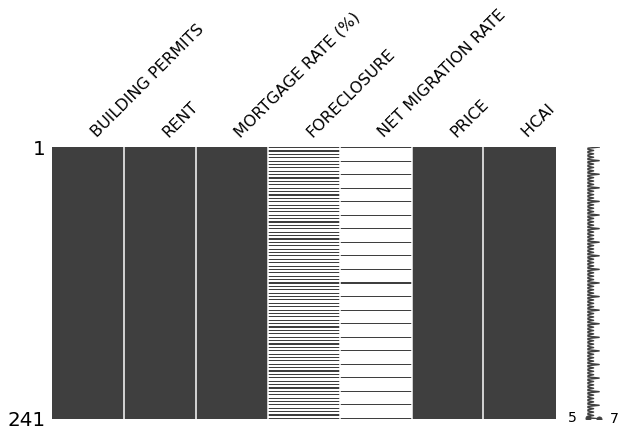

In [ ]:
import missingno
missingno.matrix(df, figsize=(10,5))

It is observed that FORECLOSURE and NET MIGRATION RATE have a lot of missing values. 
In our data we have observed the target price monthly but FORECLOSURE and NET MIGRATION RATE are quarterly and yearly observed. 
Therefore, we can replace the null values in the following way for both the features :- 

**FORECLOSURE**
* For every Quarter of the year, we'll randomly generate float values within the range of (i)th and (i+1)th quarter values for FORECLOSURE. 

**NET MIGRATION RATE**
* For every month of the particular year, the missing values will be replaced by the randomly generated float values within the range of (i)th and (i+1)th year.

In [ ]:
df['FORECLOSURE']

0      2.34
1       NaN
2       NaN
3      2.41
4       NaN
       ... 
236     NaN
237    2.74
238     NaN
239     NaN
240    2.70
Name: FORECLOSURE, Length: 241, dtype: float64

In [ ]:
for i in range(0,240,3):
  for j in range(i+1,i+3):
    df['FORECLOSURE'][j] = np.random.uniform(df['FORECLOSURE'][i],df['FORECLOSURE'][i+3])

In [ ]:
df['FORECLOSURE']

0      2.340000
1      2.359310
2      2.388381
3      2.410000
4      2.183378
         ...   
236    2.786715
237    2.740000
238    2.710784
239    2.733386
240    2.700000
Name: FORECLOSURE, Length: 241, dtype: float64

In [ ]:
df['NET MIGRATION RATE']

0      4.812
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
236      NaN
237      NaN
238      NaN
239      NaN
240    2.820
Name: NET MIGRATION RATE, Length: 241, dtype: float64

In [ ]:
for i in range(0,240,12):
  for j in range(i+1,i+12):
    df['NET MIGRATION RATE'][j] = np.random.uniform(low = min(df['NET MIGRATION RATE'][i],df['NET MIGRATION RATE'][i+12]) , high = max(df['NET MIGRATION RATE'][i],df['NET MIGRATION RATE'][i+12]))

In [ ]:
df['NET MIGRATION RATE']

0      4.812000
1      4.327592
2      4.289842
3      4.715044
4      4.475674
         ...   
236    2.837301
237    2.835305
238    2.854039
239    2.828651
240    2.820000
Name: NET MIGRATION RATE, Length: 241, dtype: float64

In [ ]:
df.head()

,BUILDING PERMITS,RENT,MORTGAGE RATE (%),FORECLOSURE,NET MIGRATION RATE,PRICE,HCAI
0,1699,188.2,7.03,2.340000,4.812000,109.846,16.253
1,1656,188.9,7.05,2.359310,4.327592,110.501,16.253
2,1659,189.6,6.95,2.388381,4.289842,111.108,16.253
3,1666,190.2,7.08,2.410000,4.715044,111.650,15.664
4,1665,191.0,7.15,2.183378,4.475674,112.162,15.664


### 3.3 Checking for Correlation with Target variable

                    BUILDING PERMITS      RENT  ...     PRICE     HCAI 
BUILDING PERMITS            1.000000 -0.329721  ...  0.105464  0.740960
RENT                       -0.329721  1.000000  ...  0.804374 -0.808928
MORTGAGE RATE (%)           0.450561 -0.840466  ... -0.491298  0.819851
FORECLOSURE                -0.886720  0.122675  ... -0.309908 -0.564513
NET MIGRATION RATE          0.376493 -0.900688  ... -0.724120  0.759380
PRICE                       0.105464  0.804374  ...  1.000000 -0.363754
HCAI                        0.740960 -0.808928  ... -0.363754  1.000000

[7 rows x 7 columns]


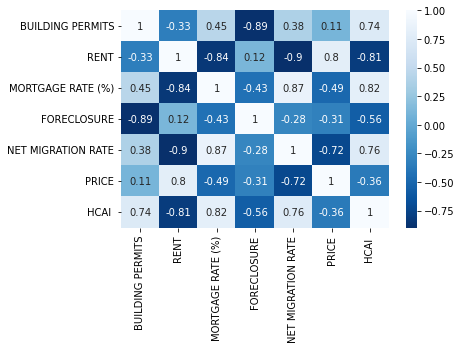

In [ ]:
print(df.corr()) 
dataplot = sns.heatmap(df.corr(), cmap="Blues_r", annot=True) 

# displaying heatmap 
plt.show()

A correlation matrix is a table showing correlation coefficients between variables. 
From the above table we can say that
* RENT and NET MIGRATION RATE are highly correlated with PRICE feature.
* A value closer to 1 implies stronger positive correlation.
* A value closer to 0 implies weaker correlation.
* A value closer to -1 implies negative positive correlation.


### 3.4 Visualizing features
This is performed to check the distribution of features, their relation with target feature, skewness and presence of outliers if any.

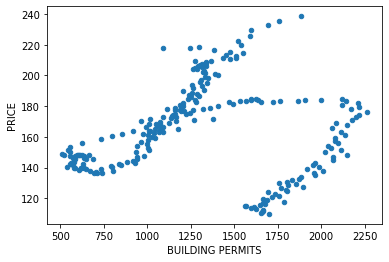

In [ ]:
df.plot(kind='scatter', x='BUILDING PERMITS', y='PRICE') ;
plt.show()

Skewness: 0.130851
Kurtosis: -0.922870


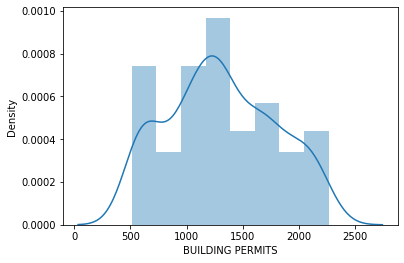

In [ ]:
sns.distplot(df['BUILDING PERMITS']);
#skewness and kurtosis
print("Skewness: %f" % df['BUILDING PERMITS'].skew())
print("Kurtosis: %f" % df['BUILDING PERMITS'].kurt())

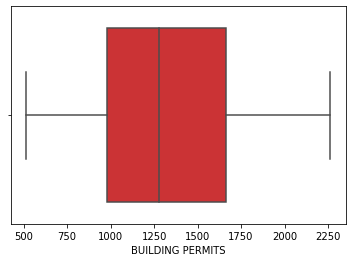

In [ ]:
sns.boxplot(df['BUILDING PERMITS'],palette="Set1")

We've observed that the feature is not skewed.
There are no outliers present which can be observed from BoxPlots. 


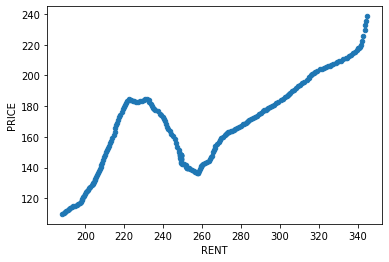

In [ ]:
df.plot(kind='scatter', x='RENT', y='PRICE') ;
plt.show()

Skewness: 0.322142
Kurtosis: -0.922372


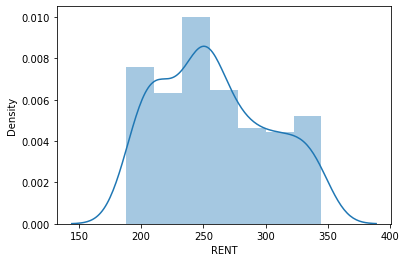

In [ ]:
sns.distplot(df['RENT']);
#skewness and kurtosis
print("Skewness: %f" % df['RENT'].skew())
print("Kurtosis: %f" % df['RENT'].kurt())

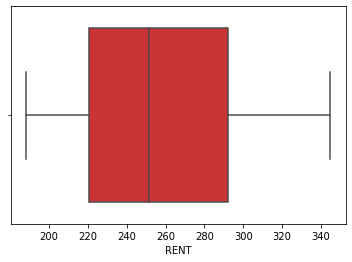

In [ ]:
sns.boxplot(df['RENT'],palette="Set1")

No skewness found and also there are no outliers present.

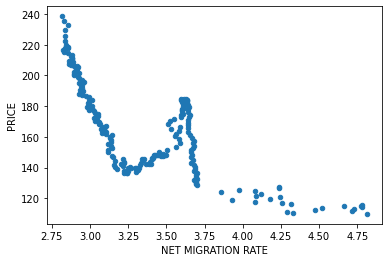

In [ ]:
df.plot(kind='scatter', x='NET MIGRATION RATE', y='PRICE') ;
plt.show()

Skewness: 1.069287
Kurtosis: 1.217844


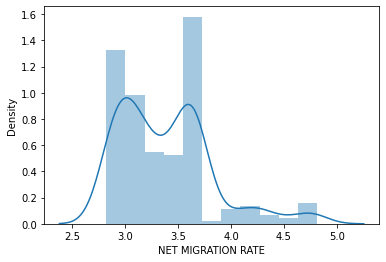

In [ ]:
sns.distplot(df['NET MIGRATION RATE']);
#skewness and kurtosis
print("Skewness: %f" % df['NET MIGRATION RATE'].skew())
print("Kurtosis: %f" % df['NET MIGRATION RATE'].kurt())

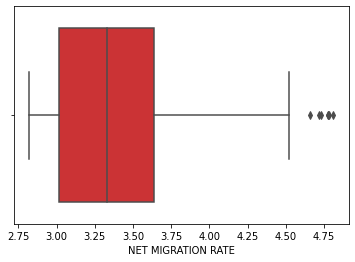

In [ ]:
sns.boxplot(df['NET MIGRATION RATE'],palette="Set1")

We've observed that the feature is skewed (Right) and there is presence of outliers in this feature as there are some values outside whiskers of the box plot. 

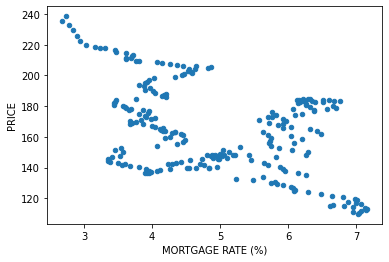

In [ ]:
df.plot(kind='scatter', x='MORTGAGE RATE (%)', y='PRICE') ;
plt.show()

Skewness: 0.192402
Kurtosis: -1.219123


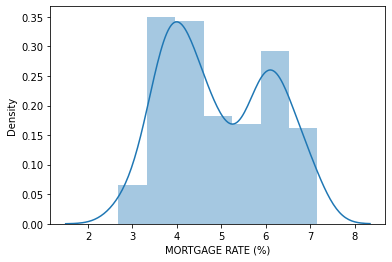

In [ ]:
sns.distplot(df['MORTGAGE RATE (%)']);
#skewness and kurtosis
print("Skewness: %f" % df['MORTGAGE RATE (%)'].skew())
print("Kurtosis: %f" % df['MORTGAGE RATE (%)'].kurt())

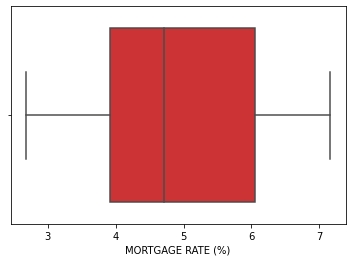

In [ ]:
sns.boxplot(df['MORTGAGE RATE (%)'],palette="Set1")

Feature not skewed and no outliers present.

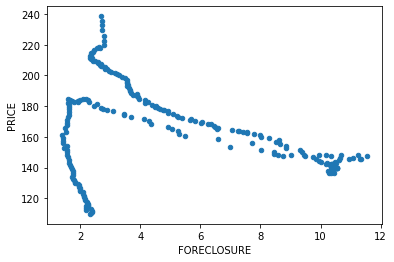

In [ ]:
df.plot(kind='scatter', x='FORECLOSURE', y='PRICE') ;
plt.show()

Skewness: 0.724799
Kurtosis: -1.036100


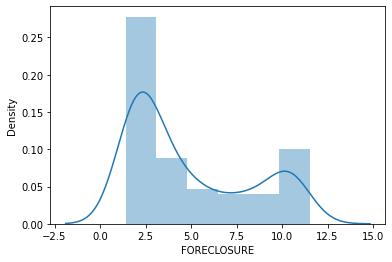

In [ ]:
sns.distplot(df['FORECLOSURE']);
#skewness and kurtosis
print("Skewness: %f" % df['FORECLOSURE'].skew())
print("Kurtosis: %f" % df['FORECLOSURE'].kurt())

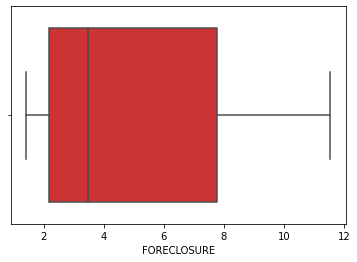

In [ ]:
sns.boxplot(df['FORECLOSURE'],palette="Set1")

Feature is moderately skewed with no outliers.

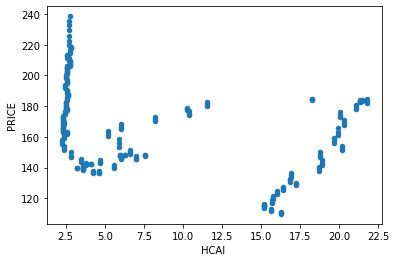

In [ ]:
df.plot(kind='scatter', x='HCAI ', y='PRICE') ;
plt.show()

Skewness: 0.733721
Kurtosis: -1.168367


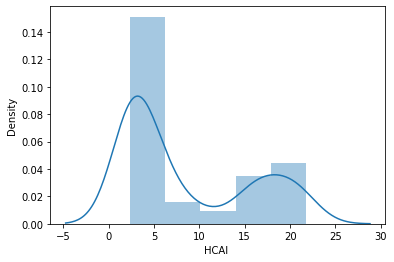

In [ ]:
sns.distplot(df['HCAI ']);
#skewness and kurtosis
print("Skewness: %f" % df['HCAI '].skew())
print("Kurtosis: %f" % df['HCAI '].kurt())

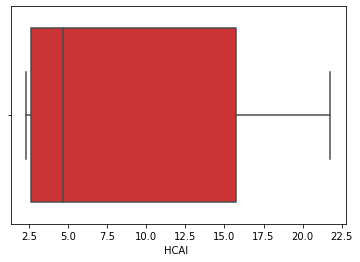

In [ ]:
sns.boxplot(df['HCAI '],palette="Set1")

Feature is moderately skewed with no outliers.

Skewness: 0.235684
Kurtosis: -0.548055


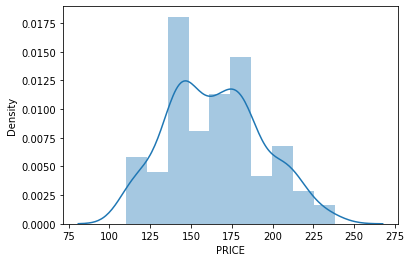

In [ ]:
sns.distplot(df['PRICE']);
#skewness and kurtosis
print("Skewness: %f" % df['PRICE'].skew())
print("Kurtosis: %f" % df['PRICE'].kurt())

Target feature is not skewed.

In [ ]:
df.skew()

BUILDING PERMITS      0.130851
RENT                  0.322142
MORTGAGE RATE (%)     0.192402
FORECLOSURE           0.724799
NET MIGRATION RATE    1.069287
PRICE                 0.235684
HCAI                  0.733721
dtype: float64

### Conclusion drawn from the visualizations above 
* It can be observed that the relationship of independent variables with the dependent variable is complicated i.e. not linear. 

### Solution to the skewness
Applying log transformations to the features which are moderately or highly skewed.
Those features are :-
* FORECLOSURE
* NET_MIGRATION_RATE
* HCAI 

In [ ]:
FORECLOSURE_LOG = np.log(df['FORECLOSURE'])

In [ ]:
FORECLOSURE_LOG.skew()

0.23361734696591724

In [ ]:
MIGRATION_RATE_LOG = np.log(df['NET MIGRATION RATE'])

In [ ]:
MIGRATION_RATE_LOG.skew()

0.7261516779727544

In [ ]:
HCAI_LOG = np.log(df['HCAI '])

In [ ]:
HCAI_LOG.skew()

0.36197879905743807

In [ ]:
df['NET MIGRATION RATE'] = MIGRATION_RATE_LOG
df['FORECLOSURE'] = FORECLOSURE_LOG
df['HCAI '] = HCAI_LOG

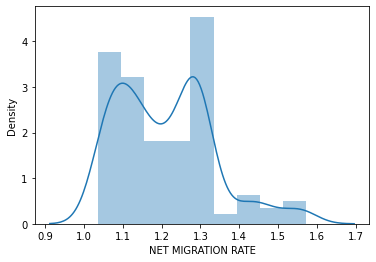

In [ ]:
sns.distplot(df['NET MIGRATION RATE'])

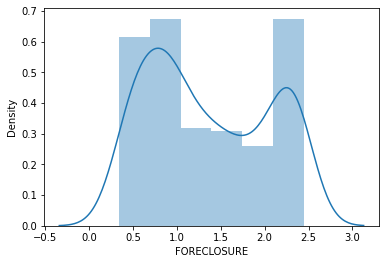

In [ ]:
sns.distplot(df['FORECLOSURE'])

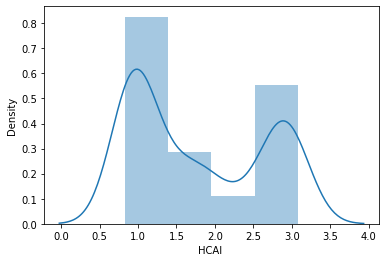

In [ ]:
sns.distplot(df['HCAI '])

In [ ]:
df.head()

,BUILDING PERMITS,RENT,MORTGAGE RATE (%),FORECLOSURE,NET MIGRATION RATE,PRICE,HCAI
0,1699,188.2,7.03,0.850151,1.571113,109.846,2.788278
1,1656,188.9,7.05,0.858369,1.465011,110.501,2.788278
2,1659,189.6,6.95,0.870616,1.456250,111.108,2.788278
3,1666,190.2,7.08,0.879627,1.550758,111.650,2.751365
4,1665,191.0,7.15,0.780873,1.498657,112.162,2.751365


Split up Data into x and y.
* x - records of features for predicting y.
* y - target variable

In [ ]:
x = df.drop('PRICE',axis = 1)
y = pd.DataFrame()
y = df['PRICE']

### Feature Scaling
Since this is a regression problem, we need to scale our features for the algorithms that use distance metric. 
If this is not done, then the feature with higher scale will become dominant.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [ ]:
col = x.columns
x[col] = scaler.fit_transform(x[col])

In [ ]:
x.head()

,BUILDING PERMITS,RENT,MORTGAGE RATE (%),FORECLOSURE,NET MIGRATION RATE,HCAI
0,0.677714,0.000000,0.970982,0.240964,1.000000,0.870076
1,0.653143,0.004471,0.975446,0.244873,0.801448,0.870076
2,0.654857,0.008942,0.953125,0.250699,0.785052,0.870076
3,0.658857,0.012775,0.982143,0.254985,0.961910,0.853677
4,0.658286,0.017885,0.997768,0.208009,0.864410,0.853677


# 4 Splitting the dataset 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x.head()

,BUILDING PERMITS,RENT,MORTGAGE RATE (%),FORECLOSURE,NET MIGRATION RATE,HCAI
0,0.677714,0.000000,0.970982,0.240964,1.000000,0.870076
1,0.653143,0.004471,0.975446,0.244873,0.801448,0.870076
2,0.654857,0.008942,0.953125,0.250699,0.785052,0.870076
3,0.658857,0.012775,0.982143,0.254985,0.961910,0.853677
4,0.658286,0.017885,0.997768,0.208009,0.864410,0.853677


In [ ]:
y.head()

0    109.846
1    110.501
2    111.108
3    111.650
4    112.162
Name: PRICE, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# 5. Machine Learning Models

### 5.1 Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
pred = reg.predict(x_test)
acc = round(reg.score(x_train,y_train)*100,2)
print("Accuracy: %s" % acc)

Accuracy: 92.19


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(pred,y_test))

65.19314569407524


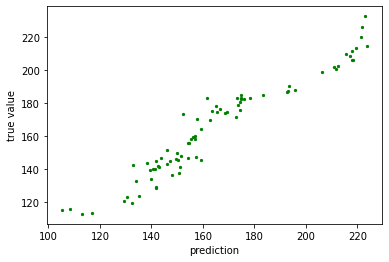

In [ ]:
plt.scatter(pred, y_test, c ="green" , s = 5) 
plt.xlabel("prediction") 
plt.ylabel("true value") 
plt.show()

Plotting the feature importance, i.e. the features which play huge role in predicting house prices.

Feature: 0, Score: 35.13433
Feature: 1, Score: 147.81055
Feature: 2, Score: 58.27747
Feature: 3, Score: 22.43936
Feature: 4, Score: -64.54703
Feature: 5, Score: 53.06551


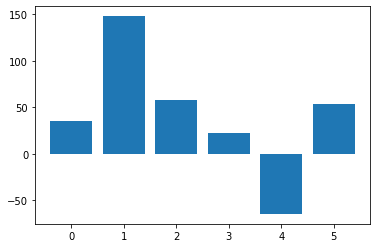

In [ ]:
import matplotlib.pyplot as plt
# get importance
importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

From the above plot, the features are ranked based on their importance(descending) below :- 
* RENT 
* NET MIGRATION RATE
* MORTGAGE RATE (%)
* HCAI
* BUILDING PERMITS
* FORECLOSURE


### 5.2 Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.02)
clf.fit(x_train, y_train)
acc = round(clf.score(x_train,y_train)*100,2)
print("Accuracy: %s" % acc)


Accuracy: 92.17


In [ ]:
predrid = clf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(predrid,y_test))

64.77283467277137


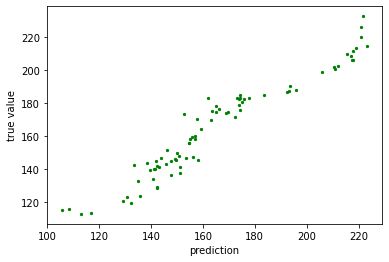

In [ ]:
plt.scatter(predrid, y_test, c ="green" , s = 5) 
plt.xlabel("prediction") 
plt.ylabel("true value") 
plt.show()

Plotting the feature importance, i.e. the features which play huge role in predicting house prices.

Feature: 0, Score: 30.71129
Feature: 1, Score: 141.65856
Feature: 2, Score: 55.44201
Feature: 3, Score: 17.00520
Feature: 4, Score: -65.67969
Feature: 5, Score: 50.60377


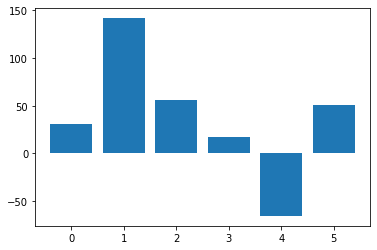

In [ ]:
import matplotlib.pyplot as plt
# get importance
importance = clf.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

From the above plot, the features are ranked based on their importance(descending) below :- 
* RENT 
* NET MIGRATION RATE
* MORTGAGE RATE (%)
* HCAI
* BUILDING PERMITS
* FORECLOSURE


### 5.3 Lasso Regression

In [ ]:
from sklearn import linear_model
clf_lasso = linear_model.Lasso(alpha=0.01)
clf_lasso.fit(x_train,y_train)

acc = round(clf_lasso.score(x_train,y_train)*100,2)
print("Accuracy: %s" % acc)

Accuracy: 92.16


In [ ]:
pred_lasso = clf_lasso.predict(x_test)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(pred_lasso,y_test))

64.58547615333948


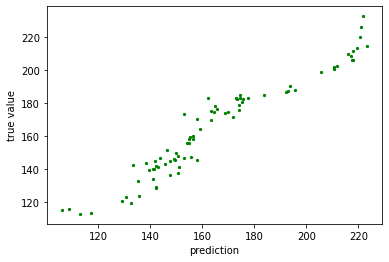

In [ ]:
plt.scatter(pred_lasso, y_test, c ="green" , s = 5) 
plt.xlabel("prediction") 
plt.ylabel("true value") 
plt.show()

Plotting the feature importance, i.e. the features which play huge role in predicting house prices.

Feature: 0, Score: 28.41372
Feature: 1, Score: 140.99276
Feature: 2, Score: 54.15275
Feature: 3, Score: 14.75852
Feature: 4, Score: -64.85060
Feature: 5, Score: 50.39330


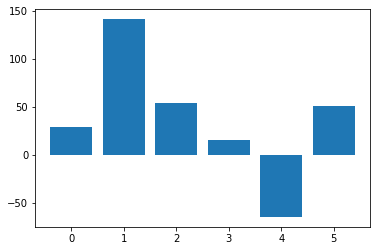

In [ ]:
import matplotlib.pyplot as plt
# get importance
importance = clf_lasso.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

From the above plot, the features are ranked based on their importance(descending) below :- 
* RENT 
* NET MIGRATION RATE
* MORTGAGE RATE (%)
* HCAI
* BUILDING PERMITS
* FORECLOSURE


### 5.4 Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=4, random_state=0, criterion='mae',n_estimators=100)
regr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
acc = round(regr.score(x_train,y_train)*100,2)
#train_pred=model_selection.cross_val_predict(regr,x_train,y_train,cv=10,n_jobs=-1)
print("Accuracy: %s" % acc)

Accuracy: 97.71


In [ ]:
predr = regr.predict(x_test)
print(mean_squared_error(predr,y_test))

17.439546400934898


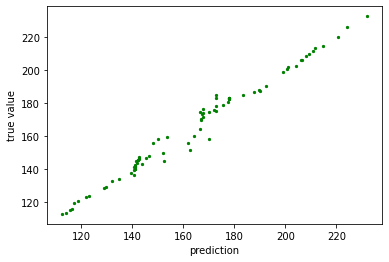

In [ ]:
plt.scatter(predr, y_test, c ="green" , s = 5) 
plt.xlabel("prediction") 
plt.ylabel("true value") 
plt.show()

Getting feature importance score from Random Forest

In [ ]:
regr.feature_importances_

array([0.02535439, 0.49462053, 0.03940412, 0.23456461, 0.18334526,
       0.02271109])

In [ ]:
imp = regr.feature_importances_

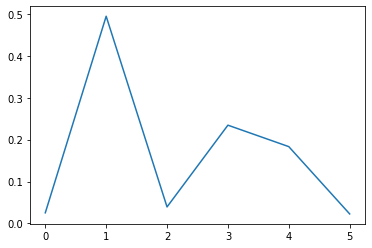

In [ ]:
plt.plot(imp)
plt.show()

From the above plot, the features are ranked based on their importance(descending) below :-

* RENT
* FORECLOSURE
* NET MIGRATION RATE
* MORTGAGE RATE (%)
* BUILDING PERMITS
* HCAI



## 5.5 SVM Regressor

In [ ]:
from sklearn import svm
svm_reg = svm.SVR(kernel='poly',degree=4,C = 1)
svm_reg.fit(x_train, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=4, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
acc = round(svm_reg.score(x_train,y_train)*100,2)
#train_pred=model_selection.cross_val_predict(svm_reg,x_train,y_train,cv=10,n_jobs=-1)
print("Accuracy: %s" % acc)

Accuracy: 99.03


In [ ]:
pred_svm = svm_reg.predict(x_test)
print(mean_squared_error(pred_svm,y_test))

12.759907491439087


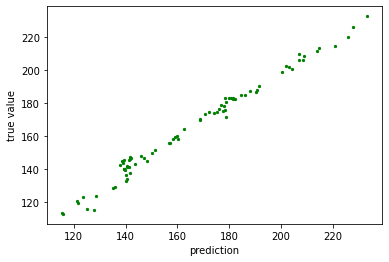

In [ ]:
plt.scatter(pred_svm, y_test, c ="green" , s = 5) 
plt.xlabel("prediction") 
plt.ylabel("true value") 
plt.show()

Since SVMs don't have inbuilt feature_importance_ like other algorithms, we'll use permutation feature importance which is a part of sklearn.inspection.

The task is simple. The values of all the features are shuffled and the error is calculated. 

If the error increases on shuffling a feature, it means that feature is important for prediction as our models relies on that feature for prediction.
But if there is no change in the model error, then the feature is not important for that model.

**Higher the error, more is the importance**

Feature: 0, Score: 295.81164
Feature: 1, Score: 11883.75818
Feature: 2, Score: 85.38112
Feature: 3, Score: 158.89246
Feature: 4, Score: 171.00412
Feature: 5, Score: 915.74051


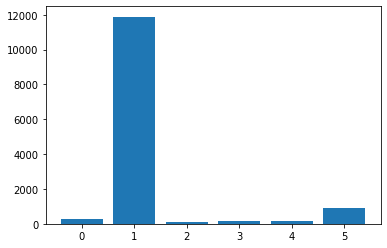

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(svm_reg, x_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

From the above plot, the features are ranked based on their importance(descending) below :-

* RENT
* HCAI
* BUILDING PERMITS
* NET MIGRATION RATE
* FORECLOSURE
* MORTGAGE RATE (%)


